In [1]:
import pandas as pd

headers = ['Unix Timestamp','Date','Symbol','Open','High','Low','Close','Volume']
data_BTUSD = pd.read_csv('../Files/gemini_BTCUSD_1hr.csv',names=headers)
data_BTUSD=data_BTUSD.drop([0,1,2])
data_BTUSD.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
3,1.56867E+12,9/16/2019 23:00,BTCUSD,10304.78,10304.78,10241.99,10271.26,24.50273959
4,1.56867E+12,9/16/2019 22:00,BTCUSD,10302.9,10325.01,10290.61,10304.78,35.26296065
5,1.56867E+12,9/16/2019 21:00,BTCUSD,10214.55,10351.86,10214.55,10302.9,179.8320635
6,1.56866E+12,9/16/2019 20:00,BTCUSD,10130.01,10217,10128.71,10214.55,43.67212722
7,1.56866E+12,9/16/2019 19:00,BTCUSD,10128.99,10140.32,10128.71,10130.01,47.03460152


In [2]:
data_BTUSD['Date']=pd.to_datetime(data_BTUSD['Date'],dayfirst=True)
data_BTUSD.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
3,1.56867E+12,2019-09-16 23:00:00,BTCUSD,10304.78,10304.78,10241.99,10271.26,24.50273959
4,1.56867E+12,2019-09-16 22:00:00,BTCUSD,10302.9,10325.01,10290.61,10304.78,35.26296065
5,1.56867E+12,2019-09-16 21:00:00,BTCUSD,10214.55,10351.86,10214.55,10302.9,179.8320635
6,1.56866E+12,2019-09-16 20:00:00,BTCUSD,10130.01,10217,10128.71,10214.55,43.67212722
7,1.56866E+12,2019-09-16 19:00:00,BTCUSD,10128.99,10140.32,10128.71,10130.01,47.03460152


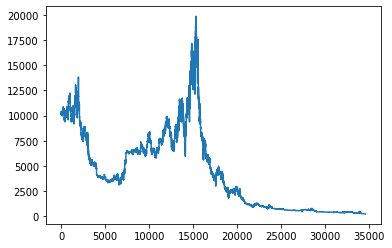

Wall time: 656 ms


In [3]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(pd.to_numeric(data_BTUSD['Close']))
# plt.xticks(rotation=45)
# plt.xlabel('Hour')
# plt.ylabel('Close price')
plt.show()

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

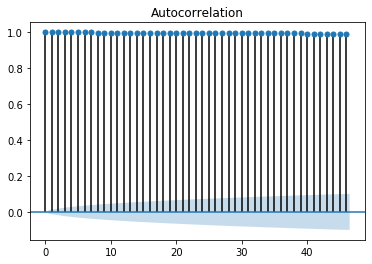

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_acf(pd.to_numeric(data_BTUSD['Close']))
plt.show()

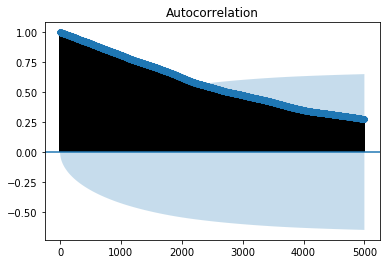

In [6]:
plot_acf(pd.to_numeric(data_BTUSD['Close']),lags=5000)
plt.show()

## ADF Test

To determine if a time series is stationary or not, we will use the ADF test which is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present.

The Null and Alternate hypothesis of the Augmented Dickey-Fuller test are defined as follows:

- Null Hypothesis states there is presence of a unit root.
- Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

Here, the Akaike Information Criterion (AIC) is used to determine the lag.

The adfuller function returns a tuple of statistics from the ADF test such as the Test Statistic, P -Value, Number of Lags Used, Number of Observations used for the ADF regression and a dictionary of Critical Values.

If the P-Value is less than the Significance Level defined, we reject the Null Hypothesis that the time series contains a unit root. In other words, by rejecting the Null hypothesis, we can conclude that the time series is stationary.

In [7]:
testdata=list(pd.to_numeric(data_BTUSD['Close']))

In [8]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts):
    adftest = adfuller(ts, autolag='AIC')
    adf_res = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

    for key, value in adftest[4].items():
        adf_res['Critical Value (%s)' % key] = value
    return adf_res

In [9]:
adf_test(testdata)

Test Statistic                    -1.684763
p-value                            0.438980
Lags Used                         51.000000
Number of Observations Used    34495.000000
Critical Value (1%)               -3.430540
Critical Value (5%)               -2.861624
Critical Value (10%)              -2.566815
dtype: float64